# Unit 1: Train your first Deep Reinforcement Learning Agent 🤖

![Cover](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/thumbnail.jpg)

In this notebook, you'll train your **first Deep Reinforcement Learning agent** a Lunar Lander agent that will learn to **land correctly on the Moon 🌕**. Using [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) a Deep Reinforcement Learning library, share them with the community, and experiment with different configurations

⬇️ Here is an example of what **you will achieve in just a couple of minutes.** ⬇️




In [1]:
%%html
<video controls autoplay><source src="https://huggingface.co/sb3/ppo-LunarLander-v2/resolve/main/replay.mp4" type="video/mp4"></video>

### The environment 🎮

- [LunarLander-v2](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

### The library used 📚

- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).

## Objectives of this notebook 🏆

At the end of the notebook, you will:

- Be able to use **Gymnasium**, the environment library.
- Be able to use **Stable-Baselines3**, the deep reinforcement learning library.
- Be able to **push your trained agent to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from Deep Reinforcement Learning Course

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments**
- 🎓 **Earn a certificate of completion** by completing 80% of the assignments.

And more!

Check 📚 the syllabus 👉 https://simoninithomas.github.io/deep-rl-course

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**

The best way to keep in touch and ask questions is **to join our discord server** to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️

Before diving into the notebook, you need to:

🔲 📝 **[Read Unit 0](https://huggingface.co/deep-rl-course/unit0/introduction)** that gives you all the **information about the course and helps you to onboard** 🤗

🔲 📚 **Develop an understanding of the foundations of Reinforcement learning** (RL process, Rewards hypothesis...) by [reading Unit 1](https://huggingface.co/deep-rl-course/unit1/introduction).

## A small recap of Deep Reinforcement Learning 📚

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

Let's do a small recap on what we learned in the first Unit:

- Reinforcement Learning is a **computational approach to learning from actions**. We build an agent that learns from the environment by **interacting with it through trial and error** and receiving rewards (negative or positive) as feedback.

- The goal of any RL agent is to **maximize its expected cumulative reward** (also called expected return) because RL is based on the _reward hypothesis_, which is that all goals can be described as the maximization of an expected cumulative reward.

- The RL process is a **loop that outputs a sequence of state, action, reward, and next state**.

- To calculate the expected cumulative reward (expected return), **we discount the rewards**: the rewards that come sooner (at the beginning of the game) are more probable to happen since they are more predictable than the long-term future reward.

- To solve an RL problem, you want to **find an optimal policy**; the policy is the "brain" of your AI that will tell us what action to take given a state. The optimal one is the one that gives you the actions that max the expected return.

There are **two** ways to find your optimal policy:

- By **training your policy directly**: policy-based methods.
- By **training a value function** that tells us the expected return the agent will get at each state and use this function to define our policy: value-based methods.

- Finally, we spoke about Deep RL because **we introduce deep neural networks to estimate the action to take (policy-based) or to estimate the value of a state (value-based) hence the name "deep."**

# Let's train our first Deep Reinforcement Learning agent and upload it to the Hub 🚀

## Get a certificate 🎓

To validate this hands-on for the [certification process](https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process), you need to push your trained model to the Hub and **get a result of >= 200**.

To find your result, go to the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) and find your model, **the result = mean_reward - std of reward**

For more information about the certification process, check this section 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

## Set the GPU 💪

- To **accelerate the agent's training, we'll use a GPU**. To do that, go to `Runtime > Change Runtime type`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step1.jpg" alt="GPU Step 1">

- `Hardware Accelerator > GPU`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step2.jpg" alt="GPU Step 2">

## Install dependencies and create a virtual screen 🔽

The first step is to install the dependencies, we’ll install multiple ones.

- `gymnasium[box2d]`: Contains the LunarLander-v2 environment 🌛
- `stable-baselines3[extra]`: The deep reinforcement learning library.
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

To make things easier, we created a script to install all these dependencies.

In [2]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 75 not upgraded.
Need to get 1086 kB of archives.
After this operation, 5413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5528 B]
Fetched 1086 kB in 0s (2705 kB/s)0m

78Selecting previously unselected package swig4.0.
(Reading database ... 113807 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 11%] [######...................

In [3]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

INFO: pip is looking at multiple versions of gymnasium[box2d] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 34.0 MB/s eta 0:00:0000:0100:01
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=494460 sha256=c7ebb2c652ea5c60b56385f676cc58d5b695911a5717514d2c570aff687771e0
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: gymnasium
    Found existing installation: 

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames).

Hence the following cell will install virtual screen libraries and create and run a virtual screen 🖥

In [25]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

!pip install moviepy==1.0.3

Hit:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease
Hit:2 https://packages.cloud.google.com/apt cloud-sdk InRelease     
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease    
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease              
Get:5 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [4156 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1509 kB]
Fetched 5799 kB in 1s (4657 kB/s)                          
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opengl is already the newest version (3.1.0+dfsg-

To make sure the new installed libraries are used, **sometimes it's required to restart the notebook runtime**. The next cell will force the **runtime to crash, so you'll need to connect again and run the code starting from here**. Thanks to this trick, **we will be able to run our virtual screen.**

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Import the packages 📦

One additional library we import is huggingface_hub **to be able to upload and download trained models from the hub**.


The Hugging Face Hub 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep reinforcement Learning models available here👉 https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads



In [6]:
import gymnasium

from huggingface_sb3 import load_from_hub, package_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

## Understand Gymnasium and how it works 🤖

🏋 The library containing our environment is called Gymnasium.
**You'll use Gymnasium a lot in Deep Reinforcement Learning.**

Gymnasium is the **new version of Gym library** [maintained by the Farama Foundation](https://farama.org/).

The Gymnasium library provides two things:

- An interface that allows you to **create RL environments**.
- A **collection of environments** (gym-control, atari, box2D...).

Let's look at an example, but first let's recall the RL loop.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

At each step:
- Our Agent receives a **state (S0)** from the **Environment** — we receive the first frame of our game (Environment).
- Based on that **state (S0),** the Agent takes an **action (A0)** — our Agent will move to the right.
- The environment transitions to a **new** **state (S1)** — new frame.
- The environment gives some **reward (R1)** to the Agent — we’re not dead *(Positive Reward +1)*.


With Gymnasium:

1️⃣ We create our environment using `gymnasium.make()`

2️⃣ We reset the environment to its initial state with `observation = env.reset()`

At each step:

3️⃣ Get an action using our model (in our example we take a random action)

4️⃣ Using `env.step(action)`, we perform this action in the environment and get
- `observation`: The new state (st+1)
- `reward`: The reward we get after executing the action
- `terminated`: Indicates if the episode terminated (agent reach the terminal state)
- `truncated`: Introduced with this new version, it indicates a timelimit or if an agent go out of bounds of the environment for instance.
- `info`: A dictionary that provides additional information (depends on the environment).

For more explanations check this 👉 https://gymnasium.farama.org/api/env/#gymnasium.Env.step

If the episode is terminated:
- We reset the environment to its initial state with `observation = env.reset()`

**Let's look at an example!** Make sure to read the code


In [3]:
import gymnasium as gym

# First, we create our environment called LunarLander-v2
env = gym.make("LunarLander-v2")

# Then we reset this environment
observation, info = env.reset()

for _ in range(20):
  # Take a random action
  action = env.action_space.sample()
  print("Action taken:", action)

  # Do this action in the environment and get
  # next_state, reward, terminated, truncated and info
  observation, reward, terminated, truncated, info = env.step(action)

  # If the game is terminated (in our case we land, crashed) or truncated (timeout)
  if terminated or truncated:
      # Reset the environment
      print("Environment is reset")
      observation, info = env.reset()

env.close()

Action taken: 2
Action taken: 1
Action taken: 2
Action taken: 3
Action taken: 3
Action taken: 2
Action taken: 3
Action taken: 3
Action taken: 0
Action taken: 2
Action taken: 0
Action taken: 2
Action taken: 0
Action taken: 2
Action taken: 3
Action taken: 1
Action taken: 0
Action taken: 3
Action taken: 3
Action taken: 2


## Create the LunarLander environment 🌛 and understand how it works

### [The environment 🎮](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In this first tutorial, we’re going to train our agent, a [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/), **to land correctly on the moon**. To do that, the agent needs to learn **to adapt its speed and position (horizontal, vertical, and angular) to land correctly.**

---


💡 A good habit when you start to use an environment is to check its documentation

👉 https://gymnasium.farama.org/environments/box2d/lunar_lander/

---


Let's see what the Environment looks like:


In [4]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ -8.074273   -14.646213     4.8124094   -0.97434133   2.7722337
   3.244642     0.17097212   0.533246  ]


We see with `Observation Space Shape (8,)` that the observation is a vector of size 8, where each value contains different information about the lander:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg contact point has touched the land (boolean)
- If the right leg contact point has touched the land (boolean)


In [5]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


The action space (the set of possible actions the agent can take) is discrete with 4 actions available 🎮:

- Action 0: Do nothing,
- Action 1: Fire left orientation engine,
- Action 2: Fire the main engine,
- Action 3: Fire right orientation engine.

Reward function (the function that will give a reward at each timestep) 💰:

After every step a reward is granted. The total reward of an episode is the **sum of the rewards for all the steps within that episode**.

For each step, the reward:

- Is increased/decreased the closer/further the lander is to the landing pad.
-  Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 10 points for each leg that is in contact with the ground.
- Is decreased by 0.03 points each frame a side engine is firing.
- Is decreased by 0.3 points each frame the main engine is firing.

The episode receive an **additional reward of -100 or +100 points for crashing or landing safely respectively.**

An episode is **considered a solution if it scores at least 200 points.**

#### Vectorized Environment

- We create a vectorized environment (a method for stacking multiple independent environments into a single environment) of 16 environments, this way, **we'll have more diverse experiences during the training.**

In [6]:
# Create the environment
env = make_vec_env('LunarLander-v2', n_envs=16)

## Create the Model 🤖
- We have studied our environment and we understood the problem: **being able to land the Lunar Lander to the Landing Pad correctly by controlling left, right and main orientation engine**. Now let's build the algorithm we're going to use to solve this Problem 🚀.

- To do so, we're going to use our first Deep RL library, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

---

💡 A good habit when using a new library is to dive first on the documentation: https://stable-baselines3.readthedocs.io/en/master/ and then try some tutorials.

----

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/sb3.png" alt="Stable Baselines3">

To solve this problem, we're going to use SB3 **PPO**. [PPO (aka Proximal Policy Optimization) is one of the SOTA (state of the art) Deep Reinforcement Learning algorithms that you'll study during this course](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

PPO is a combination of:
- *Value-based reinforcement learning method*: learning an action-value function that will tell us the **most valuable action to take given a state and action**.
- *Policy-based reinforcement learning method*: learning a policy that will **give us a probability distribution over actions**.

Stable-Baselines3 is easy to set up:

1️⃣ You **create your environment** (in our case it was done above)

2️⃣ You define the **model you want to use and instantiate this model** `model = PPO("MlpPolicy")`

3️⃣ You **train the agent** with `model.learn` and define the number of training timesteps

```
# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
```



#### Solution

In [8]:
# SOLUTION
# We added some parameters to accelerate the training
model = PPO(
    policy = 'MlpPolicy',
    env = env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cuda device


## Train the PPO agent 🏃
- Let's train our agent for 1,000,000 timesteps, don't forget to use GPU on Colab. It will take approximately ~20min, but you can use fewer timesteps if you just want to try it out.
- During the training, take a ☕ break you deserved it 🤗

#### Solution

In [9]:
# SOLUTION
# Train it for 1,000,000 timesteps
model.learn(total_timesteps=1000000)
# Save the model
model_name = "ppo-LunarLander-v2"
model.save(model_name)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.8     |
|    ep_rew_mean     | -184     |
| time/              |          |
|    fps             | 3223     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 16384    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 91.2         |
|    ep_rew_mean          | -138         |
| time/                   |              |
|    fps                  | 2295         |
|    iterations           | 2            |
|    time_elapsed         | 14           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0060014166 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.000557    |
|    learning_r

## Evaluate the agent 📈
- Remember to wrap the environment in a [Monitor](https://stable-baselines3.readthedocs.io/en/master/common/monitor.html).
- Now that our Lunar Lander agent is trained 🚀, we need to **check its performance**.
- Stable-Baselines3 provides a method to do that: `evaluate_policy`.
- To fill that part you need to [check the documentation](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- In the next step,  we'll see **how to automatically evaluate and share your agent to compete in a leaderboard, but for now let's do it ourselves**


💡 When you evaluate your agent, you should not use your training environment but create an evaluation environment.

#### Solution

In [10]:
#@title
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=262.17 +/- 20.03810266328188


- In my case, I got a mean reward of `200.20 +/- 20.80` after training for 1 million steps, which means that our lunar lander agent is ready to land on the moon 🌛🥳.

## Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

📚 The libraries documentation 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Here's an example of a Model Card (with Space Invaders):

By using `package_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account on Hugging Face ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">

- Copy the token
- Run the cell below and paste the token

In [11]:
notebook_login()
!git config --global credential.helper store

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `package_to_hub()` function

Let's fill the `package_to_hub` function:
- `model`: our trained model.
- `model_name`: the name of the trained model that we defined in `model_save`
- `model_architecture`: the model architecture we used, in our case PPO
- `env_id`: the name of the environment, in our case `LunarLander-v2`
- `eval_env`: the evaluation environment defined in eval_env
- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `(repo_id = {username}/{repo_name})`

💡 **A good name is {username}/{model_architecture}-{env_id}**

- `commit_message`: message of the commit

#### Solution


In [3]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

model_name = "ppo-LunarLander-v2"

# PLACE the variables you've just defined two cells above
# Define the name of the environment
env_id = "LunarLander-v2"

# TODO: Define the model architecture we used
model_architecture = "PPO"

## Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
## CHANGE WITH YOUR REPO ID
repo_id = "hishamcse/ppo-LunarLander-v2" # Change with your repo id, you can't push with mine 😄

## Define the commit message
commit_message = "Upload PPO LunarLander-v2 trained agent by hishamcse"

# Create the evaluation env and set the render_mode="rgb_array"
eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])

# PLACE the package_to_hub function you've just filled here
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)


ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.


/opt/conda/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Saving video to /tmp/tmp7p4yu3um/-step-0-to-step-1000.mp4
Moviepy - Building video /tmp/tmp7p4yu3um/-step-0-to-step-1000.mp4.
Moviepy - Writing video /tmp/tmp7p4yu3um/-step-0-to-step-1000.mp4



ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Moviepy - Done !
Moviepy - video ready /tmp/tmp7p4yu3um/-step-0-to-step-1000.mp4


Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/tmp/tmp7p4yu3um/-step-0-to-step-1000.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.29.100
  Duration: 00:00:20.02, start: 0.000000, bitrate: 67 kb/s
    Stream #0:0(und): Video: h264 (High) (avc1 / 0x31637661), yuv420p, 600x400, 62 kb/s, 50 fps, 50 tbr, 12800 tbn, 100 tbc (default)
    Metadata:
      handler_name    : VideoHandler
Stream mapping:
  Stream #0:0 -> #0:0 (h264 (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x5b564eef9200] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2 AVX512
[libx264 @ 0x5b564eef9200] profile High, level 3.1
[libx264 @ 0x5b564eef9200] 264 - core 155 r2917 0a84d98 - H.264/MPEG-4 AVC codec - Copyleft 2003-2018 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 tr

ℹ Pushing repo hishamcse/ppo-LunarLander-v2 to the Hugging Face Hub


ppo-LunarLander-v2.zip:   0%|          | 0.00/148k [00:00<?, ?B/s]

ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/hishamcse/ppo-LunarLander-v2/tree/main/


CommitInfo(commit_url='https://huggingface.co/hishamcse/ppo-LunarLander-v2/commit/c7c7f054898ff3d4d1000a69c682072d7b240ff6', commit_message='Upload PPO LunarLander-v2 trained agent by hishamcse', commit_description='', oid='c7c7f054898ff3d4d1000a69c682072d7b240ff6', pr_url=None, pr_revision=None, pr_num=None)

Congrats 🥳 you've just trained and uploaded your first Deep Reinforcement Learning agent. The script above should have displayed a link to a model repository such as https://huggingface.co/osanseviero/test_sb3. When you go to this link, you can:
* See a video preview of your agent at the right.
* Click "Files and versions" to see all the files in the repository.
* Click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* A model card (`README.md` file) which gives a description of the model

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

## Load a saved LunarLander model from the Hub 🤗
Thanks to [ironbar](https://github.com/ironbar) for the contribution.

Loading a saved model from the Hub is really easy.

You go to https://huggingface.co/models?library=stable-baselines3 to see the list of all the Stable-baselines3 saved models.
1. You select one and copy its repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/copy-id.png" alt="Copy-id"/>

2. Then we just need to use load_from_hub with:
- The repo_id
- The filename: the saved model inside the repo and its extension (*.zip)

Because the model I download from the Hub was trained with Gym (the former version of Gymnasium) we need to install shimmy a API conversion tool that will help us to run the environment correctly.

Shimmy Documentation: https://github.com/Farama-Foundation/Shimmy

In [17]:
!pip install shimmy

In [7]:
from huggingface_sb3 import load_from_hub
repo_id = "hishamcse/ppo-LunarLander-v2" # The repo_id
filename = "ppo-LunarLander-v2.zip" # The model filename.zip

# When the model was trained on Python 3.8 the pickle protocol is 5
# But Python 3.6, 3.7 use protocol 4
# In order to get compatibility we need to:
# 1. Install pickle5 (we done it at the beginning of the colab)
# 2. Create a custom empty object we pass as parameter to PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Linux-5.15.133+-x86_64-with-glibc2.31 # 1 SMP Tue Dec 19 13:14:11 UTC 2023
- Python: 3.10.13
- Stable-Baselines3: 2.0.0a5
- PyTorch: 2.1.2
- GPU Enabled: True
- Numpy: 1.26.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.28.1
- OpenAI Gym: 0.26.2

== SAVED MODEL SYSTEM INFO ==
- OS: Linux-5.15.133+-x86_64-with-glibc2.31 # 1 SMP Tue Dec 19 13:14:11 UTC 2023
- Python: 3.10.13
- Stable-Baselines3: 2.0.0a5
- PyTorch: 2.1.2
- GPU Enabled: True
- Numpy: 1.26.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.28.1
- OpenAI Gym: 0.26.2



Let's evaluate this agent:

In [8]:
#@title
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=268.43 +/- 12.972973405455102


## Some additional challenges 🏆
The best way to learn **is to try things by your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results!

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to achieve so:
* Train more steps
* Try different hyperparameters for `PPO`. You can see them at https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters.
* Check the [Stable-Baselines3 documentation](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) and try another model such as DQN.
* **Push your new trained model** on the Hub 🔥

**Compare the results of your LunarLander-v2 with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Is moon landing too boring for you? Try to **change the environment**, why not use MountainCar-v0, CartPole-v1 or CarRacing-v0? Check how they work [using the gym documentation](https://www.gymlibrary.dev/) and have fun 🎉.

________________________________________________________________________
Congrats on finishing this chapter! That was the biggest one, **and there was a lot of information.**

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and have a solid foundations.

Naturally, during the course, we’re going to dive deeper into these concepts but **it’s better to have a good understanding of them now before diving into the next chapters.**



Next time, in the bonus unit 1, you'll train Huggy the Dog to fetch the stick.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/huggy.jpg" alt="Huggy"/>

## Keep learning, stay awesome 🤗

# DQN From Scratch

**Credit:** Andrew Ng (ML Specialization Course 3, Week 3)

### Import 

In [26]:
import time
from collections import deque, namedtuple

import gym
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam

import base64
import random
from itertools import zip_longest

import imageio
import IPython
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from statsmodels.iolib.table import SimpleTable

tf.random.set_seed(0)
random.seed(0)

### Hyperparameters

In [27]:
MEMORY_SIZE = 100_000     # size of memory buffer
GAMMA = 0.995             # discount factor
ALPHA = 1e-3              # learning rate
NUM_STEPS_FOR_UPDATE = 4  # perform a learning update every C time steps

MINIBATCH_SIZE = 64   # mini-batch size
TAU = 1e-3            # soft update parameter
E_DECAY = 0.995       # ε decay rate for ε-greedy policy
E_MIN = 0.01          # minimum ε value for ε-greedy policy

### Analyze LunarLander Environment 

In [58]:
env = gym.make('LunarLander-v2', render_mode="rgb_array")
initial_state = env.reset()

state_size = env.observation_space.shape
num_actions = env.action_space.n

print('State Shape:', state_size)
print('Number of actions:', num_actions)

# Select an action
action = 0

# Run a single time step of the environment's dynamics with the given action.
observation, reward, terminated, truncated, info = env.step(action)

with np.printoptions(formatter={'float': '{:.3f}'.format}):
    print("Initial State:", initial_state)
    print("Action:", action)
    print("Next State:", observation)
    print("Reward Received:", reward)
    print("Episode Terminated:", terminated)
    print("Info:", info)

State Shape: (8,)
Number of actions: 4
Initial State: (array([-0.000, 1.414, -0.008, 0.122, 0.000, 0.002, 0.000, 0.000],
      dtype=float32), {})
Action: 0
Next State: [-0.000 1.416 -0.007 0.097 0.000 0.002 0.000 0.000]
Reward Received: 2.33685599452852
Episode Terminated: False
Info: {}


## Deep Q Learning

In cases where both the state and action space are discrete we can estimate the action-value function iteratively by using the Bellman equation:

$$
Q_{i+1}(s,a) = R + \gamma \max_{a'}Q_i(s',a')
$$

This iterative method converges to the optimal action-value function $Q^*(s,a)$ as $i\to\infty$. This means that the agent just needs to gradually explore the state-action space and keep updating the estimate of $Q(s,a)$ until it converges to the optimal action-value function $Q^*(s,a)$. However, in cases where the state space is continuous it becomes practically impossible to explore the entire state-action space. Consequently, this also makes it practically impossible to gradually estimate $Q(s,a)$ until it converges to $Q^*(s,a)$.

In the Deep $Q$-Learning, we solve this problem by using a neural network to estimate the action-value function $Q(s,a)\approx Q^*(s,a)$. We call this neural network a $Q$-Network and it can be trained by adjusting its weights at each iteration to minimize the mean-squared error in the Bellman equation.

Unfortunately, using neural networks in reinforcement learning to estimate action-value functions has proven to be highly unstable. Luckily, there's a couple of techniques that can be employed to avoid instabilities. These techniques consist of using a ***Target Network*** and ***Experience Replay***. We will explore these two techniques in the following sections.

### Target Network

We can train the $Q$-Network by adjusting it's weights at each iteration to minimize the mean-squared error in the Bellman equation, where the target values are given by:

$$
y = R + \gamma \max_{a'}Q(s',a';w)
$$

where $w$ are the weights of the $Q$-Network. This means that we are adjusting the weights $w$ at each iteration to minimize the following error:

$$
\overbrace{\underbrace{R + \gamma \max_{a'}Q(s',a'; w)}_{\rm {y~target}} - Q(s,a;w)}^{\rm {Error}}
$$

Notice that this forms a problem because the $y$ target is changing on every iteration. Having a constantly moving target can lead to oscillations and instabilities. To avoid this, we can create
a separate neural network for generating the $y$ targets. We call this separate neural network the **target $\hat Q$-Network** and it will have the same architecture as the original $Q$-Network. By using the target $\hat Q$-Network, the above error becomes:

$$
\overbrace{\underbrace{R + \gamma \max_{a'}\hat{Q}(s',a'; w^-)}_{\rm {y~target}} - Q(s,a;w)}^{\rm {Error}}
$$

where $w^-$ and $w$ are the weights the target $\hat Q$-Network and $Q$-Network, respectively.

In practice, we will use the following algorithm: every $C$ time steps we will use the $\hat Q$-Network to generate the $y$ targets and update the weights of the target $\hat Q$-Network using the weights of the $Q$-Network. We will update the weights $w^-$ of the the target $\hat Q$-Network using a **soft update**. This means that we will update the weights $w^-$ using the following rule:

$$
w^-\leftarrow \tau w + (1 - \tau) w^-
$$

where $\tau\ll 1$. By using the soft update, we are ensuring that the target values, $y$, change slowly, which greatly improves the stability of our learning algorithm.

In [29]:
# Create the Q-Network
q_network = Sequential([
    ### START CODE HERE ###
    Input(shape=state_size),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=num_actions, activation='linear'),
    ### END CODE HERE ###
    ])

# Create the target Q^-Network
target_q_network = Sequential([
    ### START CODE HERE ###
    Input(shape=state_size),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=num_actions, activation='linear'),
    ### END CODE HERE ###
    ])

### START CODE HERE ###
optimizer = Adam(learning_rate=ALPHA)

### Experience Replay

When an agent interacts with the environment, the states, actions, and rewards the agent experiences are sequential by nature. If the agent tries to learn from these consecutive experiences it can run into problems due to the strong correlations between them. To avoid this, we employ a technique known as **Experience Replay** to generate uncorrelated experiences for training our agent. Experience replay consists of storing the agent's experiences (i.e the states, actions, and rewards the agent receives) in a memory buffer and then sampling a random mini-batch of experiences from the buffer to do the learning. The experience tuples $(S_t, A_t, R_t, S_{t+1})$ will be added to the memory buffer at each time step as the agent interacts with the environment.

For convenience, we will store the experiences as named tuples.

In [30]:
# Store experiences as named tuples
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

## DQN Algorithm



### Utility Functions 

In [31]:
def get_experiences(memory_buffer):
    experiences = random.sample(memory_buffer, k=MINIBATCH_SIZE)
    states = tf.convert_to_tensor(np.array([e.state for e in experiences if e is not None]),dtype=tf.float32)
    actions = tf.convert_to_tensor(np.array([e.action for e in experiences if e is not None]), dtype=tf.float32)
    rewards = tf.convert_to_tensor(np.array([e.reward for e in experiences if e is not None]), dtype=tf.float32)
    next_states = tf.convert_to_tensor(np.array([e.next_state for e in experiences if e is not None]),dtype=tf.float32)
    done_vals = tf.convert_to_tensor(np.array([e.done for e in experiences if e is not None]).astype(np.uint8),
                                     dtype=tf.float32)
    return (states, actions, rewards, next_states, done_vals)


def check_update_conditions(t, num_steps_upd, memory_buffer):
    if (t + 1) % num_steps_upd == 0 and len(memory_buffer) > MINIBATCH_SIZE:
        return True
    else:
        return False
    
    
def get_new_eps(epsilon):
    return max(E_MIN, E_DECAY*epsilon)


def get_action(q_values, epsilon=0):
    if random.random() > epsilon:
        return np.argmax(q_values.numpy()[0])
    else:
        return random.choice(np.arange(4))
    
    
def update_target_network(q_network, target_q_network):
    for target_weights, q_net_weights in zip(target_q_network.weights, q_network.weights):
        target_weights.assign(TAU * q_net_weights + (1.0 - TAU) * target_weights)

### Loss Function

In the cell below, complete the `compute_loss` function by setting the $y$ targets equal to:

$$
\begin{equation}
    y_j =
    \begin{cases}
      R_j & \text{if episode terminates at step  } j+1\\
      R_j + \gamma \max_{a'}\hat{Q}(s_{j+1},a') & \text{otherwise}\\
    \end{cases}       
\end{equation}
$$

Here are a couple of things to note:

* The `compute_loss` function takes in a mini-batch of experience tuples. This mini-batch of experience tuples is unpacked to extract the `states`, `actions`, `rewards`, `next_states`, and `done_vals`. You should keep in mind that these variables are *TensorFlow Tensors* whose size will depend on the mini-batch size. For example, if the mini-batch size is `64` then both `rewards` and `done_vals` will be TensorFlow Tensors with `64` elements.


* Using `if/else` statements to set the $y$ targets will not work when the variables are tensors with many elements. However, notice that you can use the `done_vals` to implement the above in a single line of code. To do this, recall that the `done` variable is a Boolean variable that takes the value `True` when an episode terminates at step $j+1$ and it is `False` otherwise. Taking into account that a Boolean value of `True` has the numerical value of `1` and a Boolean value of `False` has the numerical value of `0`, you can use the factor `(1 - done_vals)` to implement the above in a single line of code. Here's a hint: notice that `(1 - done_vals)` has a value of `0` when `done_vals` is `True` and a value of `1` when `done_vals` is `False`.

Lastly, compute the loss by calculating the Mean-Squared Error (`MSE`) between the `y_targets` and the `q_values`. To calculate the mean-squared error you should use the already imported package `MSE`:

In [32]:
# UNQ_C2
# GRADED FUNCTION: calculate_loss

def compute_loss(experiences, gamma, q_network, target_q_network):
    """
    Calculates the loss.

    Args:
      experiences: (tuple) tuple of ["state", "action", "reward", "next_state", "done"] namedtuples
      gamma: (float) The discount factor.
      q_network: (tf.keras.Sequential) Keras model for predicting the q_values
      target_q_network: (tf.keras.Sequential) Karas model for predicting the targets

    Returns:
      loss: (TensorFlow Tensor(shape=(0,), dtype=int32)) the Mean-Squared Error between
            the y targets and the Q(s,a) values.
    """

    # Unpack the mini-batch of experience tuples
    states, actions, rewards, next_states, done_vals = experiences

    # Compute max Q^(s,a)
    max_qsa = tf.reduce_max(target_q_network(next_states), axis=-1)

    # Set y = R if episode terminates, otherwise set y = R + γ max Q^(s,a).
    ### START CODE HERE ###
    y_targets = rewards + (gamma * max_qsa * (1 - done_vals))
    ### END CODE HERE ###

    # Get the q_values
    q_values = q_network(states)
    q_values = tf.gather_nd(q_values, tf.stack([tf.range(q_values.shape[0]),
                                                tf.cast(actions, tf.int32)], axis=1))

    # tf.range(q_values.shape[0]): This generates a range of indices from 0 to batch_size - 1.
    # tf.cast(actions, tf.int32): This ensures the actions are cast to integer type (if they are not already).
    # tf.stack([tf.range(q_values.shape[0]), tf.cast(actions, tf.int32)], axis=1): This stacks the batch indices and
    # action indices together to form a 2D tensor of shape [batch_size, 2].

    # tf.gather_nd(q_values, ...): This gathers the Q-values corresponding to the given actions for each state in the batch

    # Compute the loss
    ### START CODE HERE ###
    loss = MSE(y_targets, q_values)
    ### END CODE HERE ###

    return loss

### Update Network Weights

We will use the `agent_learn` function below to implement lines ***12 -14*** of the algorithm outlined in [Fig 3](#7). The `agent_learn` function will update the weights of the $Q$ and target $\hat Q$ networks using a custom training loop. Because we are using a custom training loop we need to retrieve the gradients via a `tf.GradientTape` instance, and then call `optimizer.apply_gradients()` to update the weights of our $Q$-Network. Note that we are also using the `@tf.function` decorator to increase performance. Without this decorator our training will take twice as long. If you would like to know more about how to increase performance with `@tf.function` take a look at the [TensorFlow documentation](https://www.tensorflow.org/guide/function).

In [33]:
@tf.function
def agent_learn(experiences, gamma):
    """
    Updates the weights of the Q networks.

    Args:
      experiences: (tuple) tuple of ["state", "action", "reward", "next_state", "done"] namedtuples
      gamma: (float) The discount factor.

    """

    # Calculate the loss
    with tf.GradientTape() as tape:
        loss = compute_loss(experiences, gamma, q_network, target_q_network)

    # Get the gradients of the loss with respect to the weights.
    gradients = tape.gradient(loss, q_network.trainable_variables)

    # Update the weights of the q_network.
    optimizer.apply_gradients(zip(gradients, q_network.trainable_variables))

    # update the weights of target q_network
    update_target_network(q_network, target_q_network)

### Train The Agent

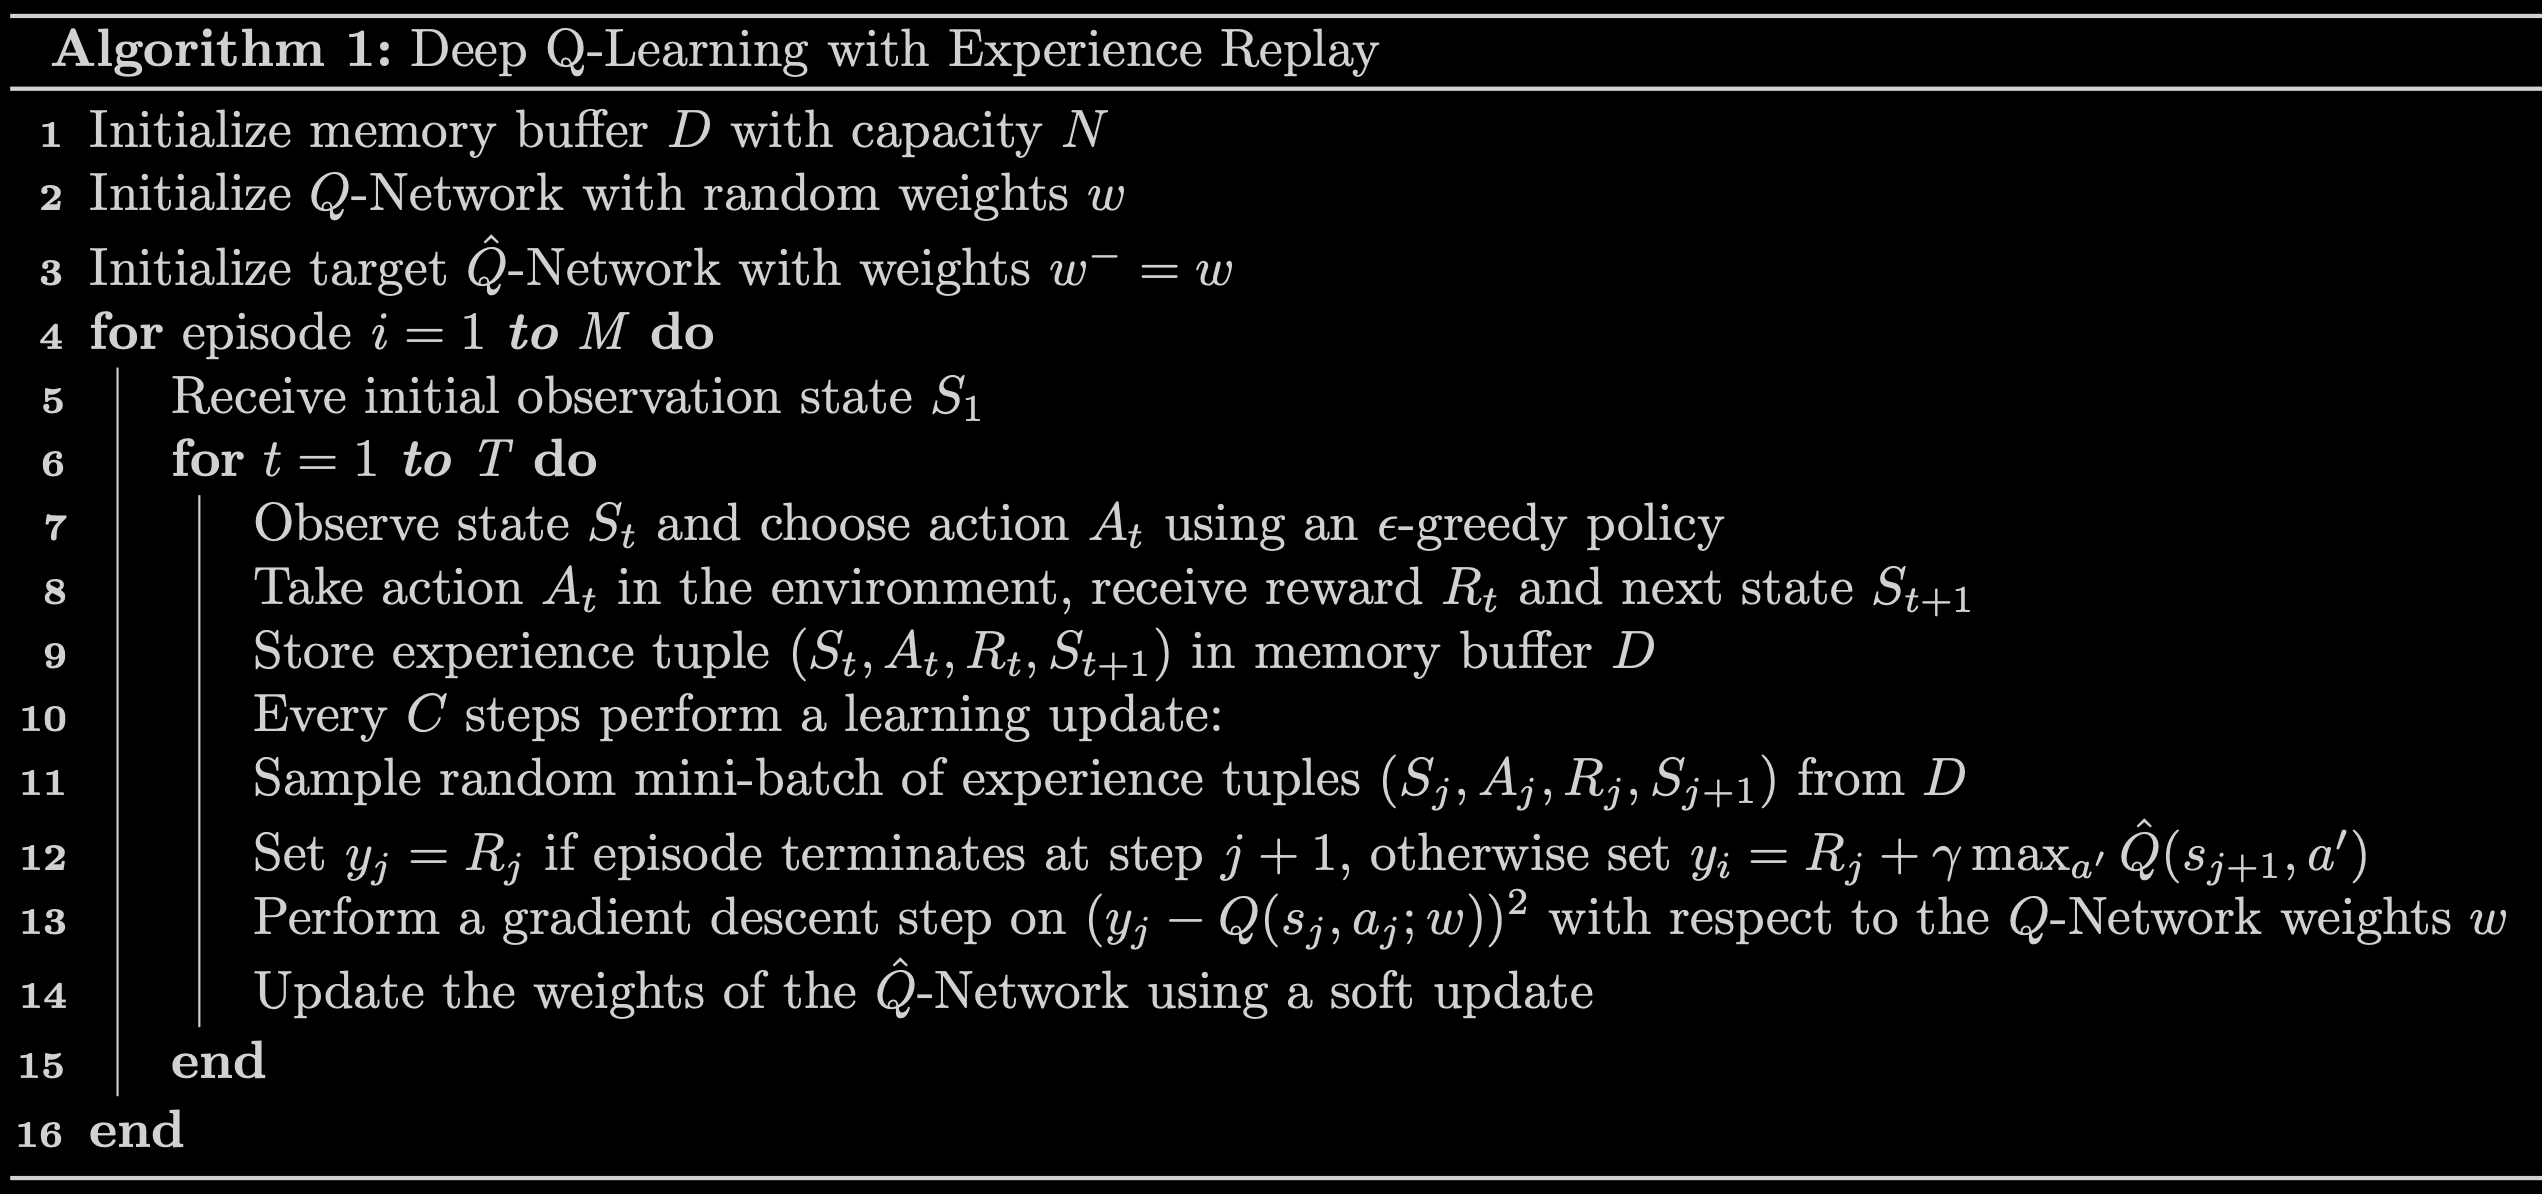

We are now ready to train our agent to solve the Lunar Lander environment.

* **Line 1**: We initialize the `memory_buffer` with a capacity of $N =$ `MEMORY_SIZE`. Notice that we are using a `deque` as the data structure for our `memory_buffer`.


* **Line 2**: We skip this line since we already initialized the `q_network` above.


* **Line 3**: We initialize the `target_q_network` by setting its weights to be equal to those of the `q_network`.


* **Line 4**: We start the outer loop. Notice that we have set $M =$ `num_episodes = 2000`. This number is reasonable because the agent should be able to solve the Lunar Lander environment in less than `2000` episodes using this notebook's default parameters.


* **Line 5**: We use the `.reset()` method to reset the environment to the initial state and get the initial state.


* **Line 6**: We start the inner loop. Notice that we have set $T =$ `max_num_timesteps = 1000`. This means that the episode will automatically terminate if the episode hasn't terminated after `1000` time steps.


* **Line 7**: The agent observes the current `state` and chooses an `action` using an $\epsilon$-greedy policy. Our agent starts out using a value of $\epsilon =$ `epsilon = 1` which yields an $\epsilon$-greedy policy that is equivalent to the equiprobable random policy. This means that at the beginning of our training, the agent is just going to take random actions regardless of the observed `state`. As training progresses we will decrease the value of $\epsilon$ slowly towards a minimum value using a given $\epsilon$-decay rate. We want this minimum value to be close to zero because a value of $\epsilon = 0$ will yield an $\epsilon$-greedy policy that is equivalent to the greedy policy. This means that towards the end of training, the agent will lean towards selecting the `action` that it believes (based on its past experiences) will maximize $Q(s,a)$. We will set the minimum $\epsilon$ value to be `0.01` and not exactly 0 because we always want to keep a little bit of exploration during training. If you want to know how this is implemented in code we encourage you to take a look at the `utils.get_action` function in the `utils` module.


* **Line 8**: We use the `.step()` method to take the given `action` in the environment and get the `reward` and the `next_state`.


* **Line 9**: We store the `experience(state, action, reward, next_state, done)` tuple in our `memory_buffer`. Notice that we also store the `done` variable so that we can keep track of when an episode terminates. This allowed us to set the $y$ targets in [Exercise 2](#ex02).


* **Line 10**: We check if the conditions are met to perform a learning update. We do this by using our custom `utils.check_update_conditions` function. This function checks if $C =$ `NUM_STEPS_FOR_UPDATE = 4` time steps have occured and if our `memory_buffer` has enough experience tuples to fill a mini-batch. For example, if the mini-batch size is `64`, then our `memory_buffer` should have at least `64` experience tuples in order to pass the latter condition. If the conditions are met, then the `utils.check_update_conditions` function will return a value of `True`, otherwise it will return a value of `False`.


* **Lines 11 - 14**: If the `update` variable is `True` then we perform a learning update. The learning update consists of sampling a random mini-batch of experience tuples from our `memory_buffer`, setting the $y$ targets, performing gradient descent, and updating the weights of the networks. We will use the `agent_learn` function we defined in [Section 8](#8) to perform the latter 3.


* **Line 15**: At the end of each iteration of the inner loop we set `next_state` as our new `state` so that the loop can start again from this new state. In addition, we check if the episode has reached a terminal state (i.e we check if `done = True`). If a terminal state has been reached, then we break out of the inner loop.


* **Line 16**: At the end of each iteration of the outer loop we update the value of $\epsilon$, and check if the environment has been solved. We consider that the environment has been solved if the agent receives an average of `200` points in the last `100` episodes. If the environment has not been solved we continue the outer loop and start a new episode.

Finally, we wanted to note that we have included some extra variables to keep track of the total number of points the agent received in each episode. This will help us determine if the agent has solved the environment and it will also allow us to see how our agent performed during training. We also use the `time` module to measure how long the training takes.

<br>

**Note:** With this notebook's default parameters, the following cell takes between 10 to 15 minutes to run.

In [44]:
start = time.time()

num_episodes = 2000
max_num_timesteps = 1000

total_point_history = []

num_p_av = 100    # number of total points to use for averaging
epsilon = 1.0     # initial ε value for ε-greedy policy

# Create a memory buffer D with capacity N
memory_buffer = deque(maxlen=MEMORY_SIZE)

# Set the target network weights equal to the Q-Network weights
target_q_network.set_weights(q_network.get_weights())

for i in range(num_episodes):

    # Reset the environment to the initial state and get the initial state
    observation, info = env.reset()
    state = observation
    total_points = 0

    for t in range(max_num_timesteps):

        # From the current state S choose an action A using an ε-greedy policy
        state_qn = np.expand_dims(state, axis=0)  # state needs to be the right shape for the q_network
        q_values = q_network(state_qn)
        action = get_action(q_values, epsilon)

        # Take action A and receive reward R and the next state S'
#         observation, reward, terminated, truncated, info = 
        next_state, reward, done, _, _ = env.step(action)

        # Store experience tuple (S,A,R,S') in the memory buffer.
        # We store the done variable as well for convenience.
        memory_buffer.append(experience(state, action, reward, next_state, done))

        # Only update the network every NUM_STEPS_FOR_UPDATE time steps.
        update = check_update_conditions(t, NUM_STEPS_FOR_UPDATE, memory_buffer)

        if update:
            # Sample random mini-batch of experience tuples (S,A,R,S') from D
            experiences = get_experiences(memory_buffer)

            # Set the y targets, perform a gradient descent step,
            # and update the network weights.
            agent_learn(experiences, GAMMA)

        state = next_state.copy()
        total_points += reward

        if done:
            break

    total_point_history.append(total_points)
    av_latest_points = np.mean(total_point_history[-num_p_av:])

    # Update the ε value
    epsilon = get_new_eps(epsilon)

    print(f"\rEpisode {i+1} | Total point average of the last {num_p_av} episodes: {av_latest_points:.2f}", end="")

    if (i+1) % num_p_av == 0:
        print(f"\rEpisode {i+1} | Total point average of the last {num_p_av} episodes: {av_latest_points:.2f}")

    # We will consider that the environment is solved if we get an
    # average of 250 points in the last 100 episodes.
    if av_latest_points >= 250.0:
        print(f"\n\nEnvironment solved in {i+1} episodes!")
        q_network.save('lunar_lander_model.h5')
        break

tot_time = time.time() - start

print(f"\nTotal Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)")

Episode 100 | Total point average of the last 100 episodes: -147.78
Episode 200 | Total point average of the last 100 episodes: -80.342
Episode 300 | Total point average of the last 100 episodes: -48.29
Episode 400 | Total point average of the last 100 episodes: 42.463
Episode 500 | Total point average of the last 100 episodes: 148.15
Episode 600 | Total point average of the last 100 episodes: 172.02
Episode 700 | Total point average of the last 100 episodes: 197.03
Episode 800 | Total point average of the last 100 episodes: 236.05
Episode 841 | Total point average of the last 100 episodes: 250.14

Environment solved in 841 episodes!

Total Runtime: 2255.78 s (37.60 min)


### Plot Results 

In [45]:
def plot_history(reward_history, rolling_window=20, lower_limit=None,
                 upper_limit=None, plot_rw=True, plot_rm=True):
    
    if lower_limit is None or upper_limit is None:
        rh = reward_history
        xs = [x for x in range(len(reward_history))]
    else:
        rh = reward_history[lower_limit:upper_limit]
        xs = [x for x in range(lower_limit,upper_limit)]
    
    df = pd.DataFrame(rh)
    rollingMean = df.rolling(rolling_window).mean()

    plt.figure(figsize=(10,7), facecolor='white')
    
    if plot_rw:
        plt.plot(xs, rh, linewidth=1, color='cyan')
    if plot_rm:
        plt.plot(xs, rollingMean, linewidth=2, color='magenta')

    text_color = 'black'
        
    ax = plt.gca()
    ax.set_facecolor('black')
    plt.grid()
#     plt.title("Total Point History", color=text_color, fontsize=40)
    plt.xlabel('Episode', color=text_color, fontsize=30)
    plt.ylabel('Total Points', color=text_color, fontsize=30)
    yNumFmt = mticker.StrMethodFormatter('{x:,}')
    ax.yaxis.set_major_formatter(yNumFmt)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    plt.show()

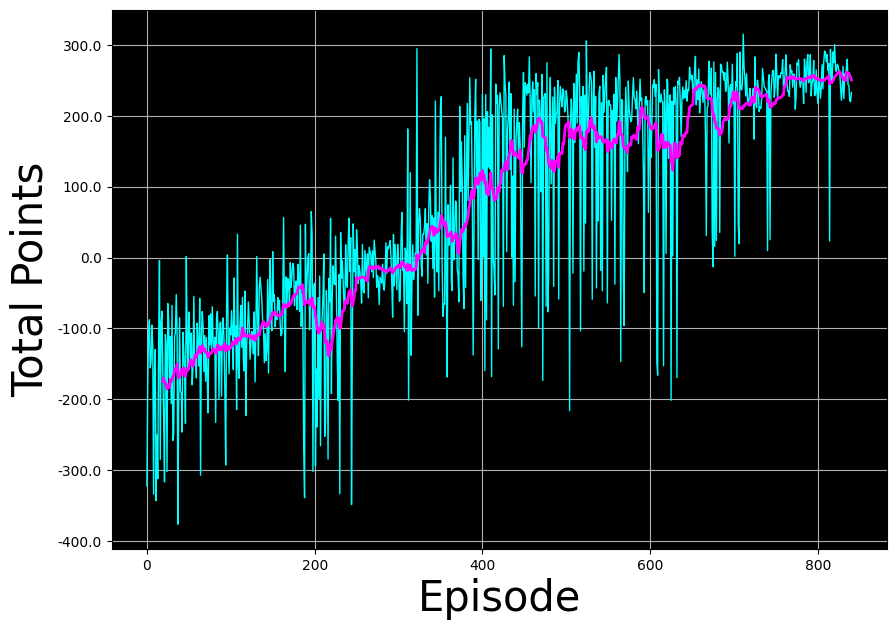

In [46]:
# Plot the point history
plot_history(total_point_history)

### See The Trained Agent In Action 

In [61]:
def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="840" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())
    return IPython.display.HTML(tag)
        
        
def create_video(filename, env, q_network, fps=30):
    with imageio.get_writer(filename, fps=fps) as video:
        done = False
        state, _ = env.reset()
        frame = env.render()
        video.append_data(frame)
        while not done:    
            state = np.expand_dims(state, axis=0)
            q_values = q_network(state)
            action = np.argmax(q_values.numpy()[0])
            state, _, done, _, _ = env.step(action)
            frame = env.render()
            video.append_data(frame)

In [52]:
# Suppress warnings from imageio
import logging
logging.getLogger().setLevel(logging.ERROR)

In [63]:
filename = "lunar_lander.mp4"

create_video(filename, env, q_network)
embed_mp4(filename)

[swscaler @ 0x7278980] Warning: data is not aligned! This can lead to a speed loss
